In [2]:
dat = read.csv("../datasets/dormancy.csv")
names(dat)

[1] "pop"          "mother"       "crossID"      "blocktray"    "timetosowing"
[6] "MCseed"       "nseed"        "germ2"       

In [5]:
subdat = dat[dat$pop=="CC",]
germ = subdat$germ2 * subdat$nseed #Successes
notgerm = subdat$nseed - germ #Failures
mod1 = glm(cbind(germ, notgerm) ~ timetosowing, "binomial", data=subdat)
summary(mod1)


Call:
glm(formula = cbind(germ, notgerm) ~ timetosowing, family = "binomial", 
    data = subdat)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.584593   0.318593  -11.25   <2e-16 ***
timetosowing  0.033410   0.002825   11.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 536.7  on 230  degrees of freedom
Residual deviance: 337.4  on 229  degrees of freedom
AIC: 387.14

Number of Fisher Scoring iterations: 4


In [6]:
mod2 = glm(germ2 ~ timetosowing, "binomial", weights=nseed, data=subdat)
summary(mod2)


Call:
glm(formula = germ2 ~ timetosowing, family = "binomial", data = subdat, 
    weights = nseed)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.584593   0.318593  -11.25   <2e-16 ***
timetosowing  0.033410   0.002825   11.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 536.7  on 230  degrees of freedom
Residual deviance: 337.4  on 229  degrees of freedom
AIC: 387.14

Number of Fisher Scoring iterations: 4


In [8]:
# this will give the time of after-ripening required to give 
# 50% probability of germination
coefs <- coef(mod1)
b0 <- coefs[1]
b1 <- coefs[2]
x50 <- -b0 / b1
x50

(Intercept) 
   107.2903 

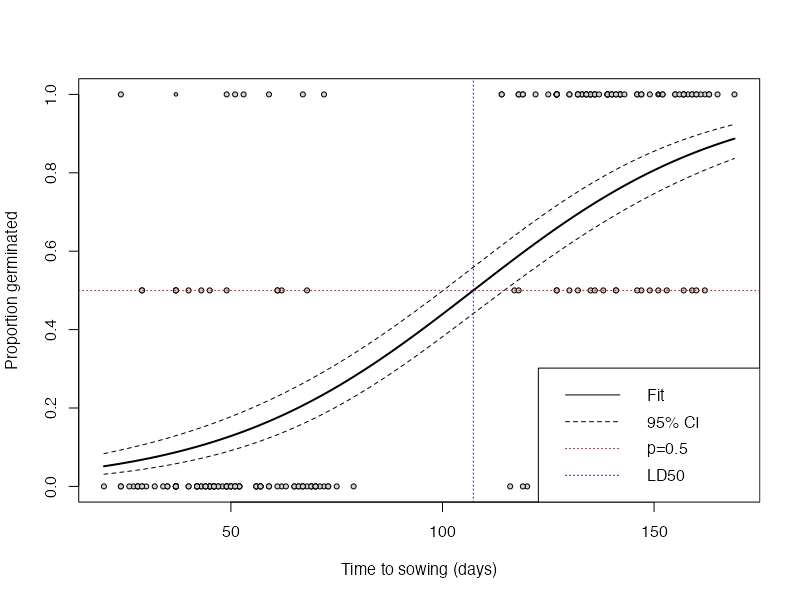

In [10]:
invlogit <- function(x) 1 / (1 + exp(-x))

# prepare x-range for smooth curve
x_pred <- seq(min(subdat$timetosowing), max(subdat$timetosowing), length.out = 200)

# get link predictions and SE on link scale, then transform
pred_link <- predict(mod1, newdata = data.frame(timetosowing = x_pred), type = "link", se.fit = TRUE)
fit_link <- pred_link$fit
se_link <- pred_link$se.fit

# confidence bands on link scale
link_low <- fit_link - 1.96 * se_link
link_high <- fit_link + 1.96 * se_link

# transform to probability scale
p_hat <- invlogit(fit_link)
p_low <- invlogit(link_low)
p_high <- invlogit(link_high)

# plot observed proportions (use weights nseed to get point sizes)
obs_p <- subdat$germ2
sizes <- sqrt(subdat$nseed)  # visual weight

plot(subdat$timetosowing, obs_p, pch = 21, bg = "lightgray",
     cex = sizes/2, ylim = c(0,1), xlab = "Time to sowing (days)",
     ylab = "Proportion germinated")
lines(x_pred, p_hat, lwd = 2)
lines(x_pred, p_low, lty = 2)
lines(x_pred, p_high, lty = 2)

# add lines for p=0.5 and LD50
abline(h = 0.5, col = "red", lty = 3)
abline(v = x50, col = "blue", lty = 3)
legend("bottomright", legend = c("Fit", "95% CI", "p=0.5", "LD50"), 
       lty = c(1,2,3,3), col = c("black","black","red","blue"))
